# Retrieval Augmented Generation

In retrieval augmented generation (RAG), an LLM retrieves contextual documents from an external dataset as part of its execution.

This is useful if we want to ask question about specific documents (e.g., our PDFs, a set of videos, etc).

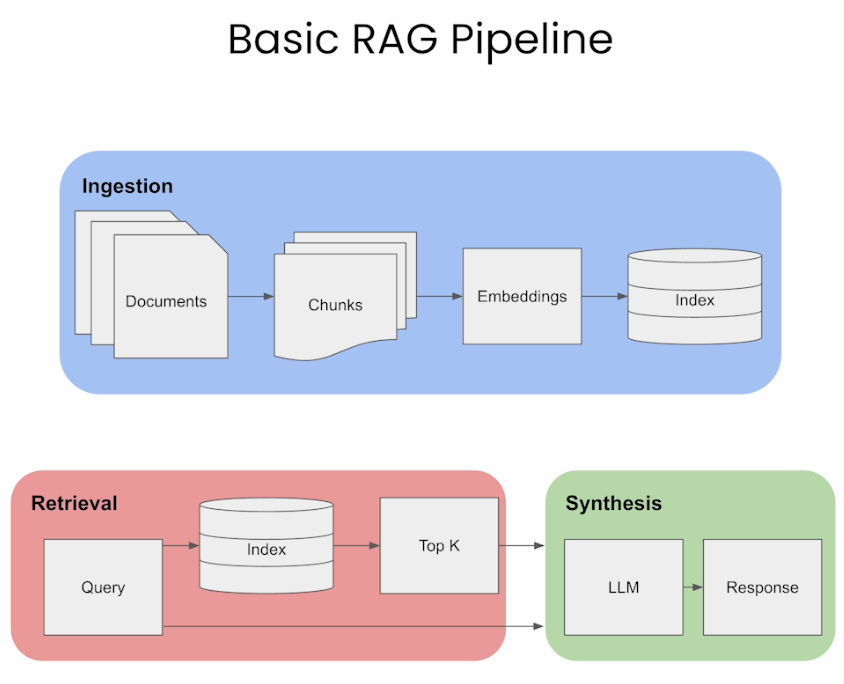

## LangChain
LangChain is a powerful framework designed for building applications that leverage language models. It offers an extensive suite of tools and capabilities for integrating various NLP models and services, enabling developers to create sophisticated language-based applications efficiently.

* Key Features: LangChain provides modular components that allow for easy customization and extension. These include tools for text generation, translation, summarization, and more, facilitating the seamless development of diverse language-driven functionalities.

* Use Cases: LangChain is ideal for a wide range of applications such as chatbots, virtual assistants, automated content creation, and sentiment analysis. Its flexibility and robust feature set make it a go-to choice for developers aiming to harness the power of language models in innovative ways.

In [ ]:
!pip install langchain

In [ ]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.5/362.5 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.6 MB/s eta 0:00:00


In [ ]:
!pip install python-dotenv

In [ ]:
!pip install langchain langchain-community

# Document Loading

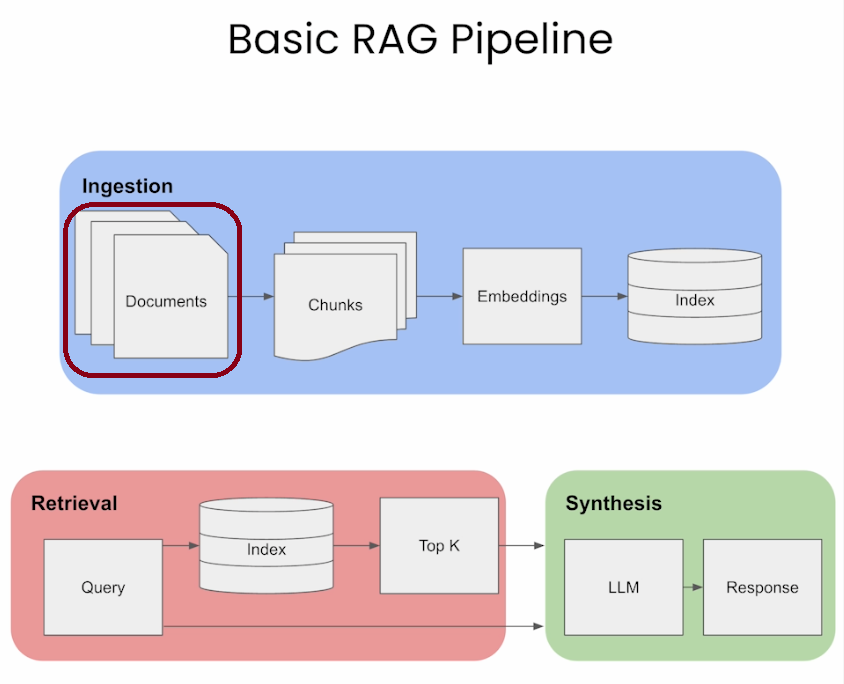

## Loaders:
Loaders are components in LangChain designed to ingest and preprocess data from various sources, preparing it for use with language models.
  
* Data Sources: Loaders can handle multiple types of data sources including text files, web pages, APIs, databases, and more.

* Preprocessing: They perform necessary preprocessing steps such as tokenization, normalization, and format conversion to ensure data is in the optimal state for model consumption.

* Customization: Loaders can be customized to handle specific data formats and preprocessing requirements, providing flexibility to suit different application needs.

* Integration: They seamlessly integrate with other LangChain components, streamlining the workflow from data ingestion to model deployment.

In [ ]:
# import os
# import openai
# import sys
# sys.path.append('../..')


## PDF Loader

Let's load a PDF

In [ ]:
! pip install pypdf

In [ ]:
from langchain.document_loaders import PyPDFLoader
loader = PyPDFLoader("/content/National_AI_Policy_Consultation_Draft_1722220582.pdf") #add path of your document
pages = loader.load()

Each page is a `Document`.

A `Document` contains text (`page_content`) and `metadata`.

In [ ]:
len(pages)

41

In [ ]:
page = pages[0]

In [ ]:
page

Document(metadata={'source': '/content/National_AI_Policy_Consultation_Draft_1722220582.pdf', 'page': 0}, page_content=' \n \ni\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n                        Draft\nNational\n \nArtificial Intelligence Policy\n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \n \nGovernment of Pakistan\nMinistry of Information Technology & Telecommunication\nhttps://moitt.gov.pk\n \n \n \n')

In [ ]:
print(page.page_content[0:500])

 
 
i
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
                        Draft
National
 
Artificial Intelligence Policy
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
Government of Pakistan
Ministry of Information Technology & Telecommunication
https://moitt.gov.pk
 
 
 



In [ ]:
page.metadata['page']

0

## Text Loader

In [ ]:
from langchain_community.document_loaders import TextLoader

loader = TextLoader("/content/National AI policy.txt")
data = loader.load()

In [ ]:
len(data)

1

In [ ]:
data

[Document(metadata={'source': '/content/National AI policy.txt'}, page_content='i\n Draft\nNational Artificial Intelligence Policy\nGovernment of Pakistan\nMinistry of Information Technology & Telecommunication\nhttps://moitt.gov.pk\nii\nAcknowledgments\nThe Government of Pakistan, Ministry of IT & Telecom, pays its gratitude to all the officials and consultants, \nparticularly RSM Pakistan and GlowBug Technologies (Pvt.) Ltd., facilitators, developers, and stakeholders who \nrigorously and relentlessly participated in the review, drafting, harmonizing, and ratification of the National \nArtificial Intelligence Policy – 2022, helping the Ministry with an all-inclusive user-centric, evidence-based, \nforward-looking, and agile policy framework for enabling Pakistan towards a digital economy and society.\niii\nTable of Contents\n1 Executive Summary................................................................................................................................6\n2 Introduct

## Docs Loader

In [ ]:
!pip install docx2txt

In [ ]:
from langchain_community.document_loaders import Docx2txtLoader

loader = Docx2txtLoader("/content/basic course outline.docx")
doc_data = loader.load()

In [ ]:
doc_data

[Document(metadata={'source': '/content/basic course outline.docx'}, page_content='AI basic Course\n\n\n\nCourse Overview:\n\nThis course provides a comprehensive exploration of artificial intelligence, focusing on both foundational concepts and advanced techniques. It is designed to equip participants with the knowledge and skills required to understand and apply AI in various contexts. Through a blend of theoretical insights and practical applications, learners will gain a deep understanding of the current state and future potential of AI. The course emphasizes hands-on experience and real-world applications, preparing participants to leverage AI technologies in their personal and professional endeavors. \n\nLearning Objective:\n\nUnderstand the fundamental principles of artificial intelligence, machine learning, and deep learning.\n\nGain proficiency in basic programming skills.\n\nDevelop practical skills in data preprocessing, exploratory data analysis, and model evaluation.\n\nLe

In [ ]:
doc_data[0].metadata

{'source': '/content/basic course outline.docx'}

## URLs

In [ ]:
from langchain.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://www.xevensolutions.com/")

In [ ]:
docs = loader.load()

In [ ]:
docs

[Document(metadata={'source': 'https://www.xevensolutions.com/', 'title': 'Xeven Solutions - AI Development & Solutions Company', 'description': 'Xeven Solutions is a leading AI Development & Solutions Company providing custom AI-based software services to automate workflow and boost innovation.', 'language': 'en-US'}, page_content="\n\n\n\n\n\n\nXeven Solutions - AI Development & Solutions Company\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n \n \n\n\n\n\n\n \n\n\n\n\n\n\n\n\n \n\n\nServices\n\nAI Development Services AI Chatbot Development Predictive Modelling\u200b Mobile App Development Chat GPT Integrations Custom Software Natural Language Processing Digital Marketing Machine Learning DevOps Computer Vision\u200b Custom Web Development Staff Augmentation UI UX Design\n\nSalesforce\nIndustries\n\nHealthTech EdTech FinTech GreenTech Internet of Things Retail AI Diagnostics E-Com

In [ ]:
print(docs[0].page_content[:500])








Xeven Solutions - AI Development & Solutions Company











































































 
 





 








 


Services

AI Development Services AI Chatbot Development Predictive Modelling​ Mobile App Development Chat GPT Integrations Custom Software Natural Language Processing Digital Marketing Machine Learning DevOps Computer Vision​ Custom Web Development Staff Augmentation UI UX Design

Salesforce
Industries

HealthTech EdTech FinTech GreenTech 
